## Daten auswerten

Data size: (7999999, 26)
Types of mobile: 8
['Base Station' 'Class A' 'Class B' 'AtoN' 'Man Overboard Device'
 'Search and Rescue Transponder' 'SAR Airborne' 'Emergency PIRB']
Type of mobile
Class A                          7076009
Base Station                      588838
Class B                           285153
AtoN                               45775
Man Overboard Device                3088
SAR Airborne                        1116
Emergency PIRB                        11
Search and Rescue Transponder          9
Name: count, dtype: int64
Number of Units: 2588
Number of Base Station: 42
Number of Class B: 785
Number of AtoN: 120
Number of Man Overboard Device: 1
Number of SAR Airborne: 4
Number of Emergency PIRB: 2
Number of Search and Rescue Transponder: 2
Number of Class A: 1765
MMSI
256082000    33769
311358000    33751
261268000    29914
246100000    28367
477035800    24527
             ...  
224985000        1
219022560        1
219022370        1
649260184        1
255805390    

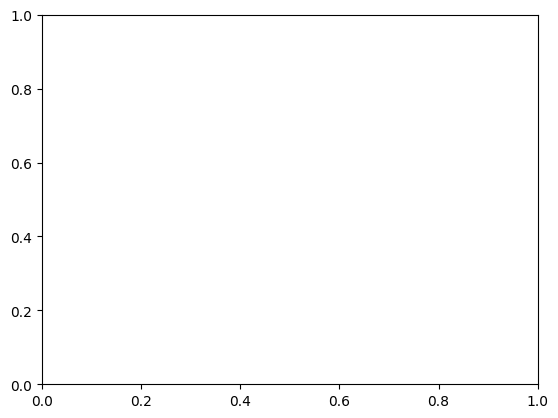

In [2]:
import pandas as pd
import sklearn as sk
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.neural_network import MLPRegressor

from autosklearn.regression import AutoSklearnRegressor
import autosklearn.metrics

import time # localtime to unix time
from datetime import datetime  # localtime to unix time
from datetime import date # localtime to unix time

from pathlib import Path

import time # localtime to unix time


from joblib import Parallel, delayed
from tqdm import tqdm
import numpy as np
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

#filename = "aisdk-2023-11-08-6xs"
filename = "aisdk-2023-11-08-s"
#filename = "aisdk-2023-11-08-6xs_2_kkn"
#filename = "aisTestFile_500k_kkn"
#filename = "aisdk-2023-11-11_266288000_s_1_kkn_Step2b"

folderoutput = "../workdir/AIS-Images/"

# data =  pd.read_csv("../workdir/AIS-KNN-Files/aisdk-2023-11-08-xs_2_kkn.csv", lineterminator='$').values.reshape((-1,100,6))
data =  pd.read_csv(f"../workdir/AIS-Files/{filename}.csv")#, lineterminator='$')#.values.reshape((-1,100,6))

# https://github.com/sktime/sktime/blob/v0.11.4/sktime/datatypes/_panel/_convert.py#L608-L668
#multiindex = pd.MultiIndex.from_product([range(s) for s in data.shape], names=["track", "timeindex", "column"])
#data = pd.Series(data.flatten(), index=multiindex).unstack(level="column")
#data.columns = ["mmsi", "time", "x", "y", "deg", "dist"]
#data = data.drop(columns=["deg", "dist"])
#data["time"] = pd.to_datetime(data["time"], unit="s")


data.head(100)

#print(f"Type of mobile: {data['Type of mobile'].nunique()}")
#print(f"Type of mobile: {data['Type of mobile'].nunique()}")
#print(data.Type of mobile.unique())

# Anzahl der Datenpunkte
print(f"Data size: {data.shape}")
print(f"Types of mobile: {data['Type of mobile'].nunique()}")
#print(data.MMSI.unique()) 
print(pd.unique(data['Type of mobile'])) 
print(data['Type of mobile'].value_counts())
print(f"Number of Units: {data['MMSI'].nunique()}") 
#print(f"Number of Class A: {data['MMSI'].nunique()}")

data['Type of mobile'].hist(bins=data['Type of mobile'].nunique())
plt.ylabel('Anzahl')
plt.xlabel('Type of mobile')
#plt.show
plt.savefig(f"{folderoutput}{filename}_TOM.png", bbox_inches='tight', dpi=600)
plt.cla()

# Histogramm Type of mobile
#print(data['Type of mobile'].value_counts().plot(kind='bar'))
#print(data['Type of mobile'].hist())

#print(data['Type of mobile'].value_counts("Base Station"))
#print(data['Type of mobile'].value_counts("Class B"))
#print(data['Type of mobile'].value_counts("AtoN"))
#print(data['Type of mobile'].value_counts("Man Overboard Device"))

# Time

#ddata = data.copy()


#epoch_time = dt.timestamp()
'''Wandelt das Datumsformat (DD/MM/YYYY HH:MM:SS) in Unix Zeit um'''
'''Wandelt das Datumsformat (YYYY-MM-DDTHH:MM:SS) in Unix Zeit um'''
#print(ddata.shape)
#elements = ddata[['# Timestamp']].to_numpy()
#print(elements.shape)

# print(elements)

#tmpElement = []
#posElement = 0

    # timeformat (DD/MM/YYYY HH:MM:SS)

#while posElement < len(elements):
#    tmpElement = elements[posElement][0]     
#    tmpElement = tmpElement.replace(':','/')
#    tmpElement = tmpElement.replace(' ','/')
#    tmpElement = list(map(int,tmpElement.split('/')))
#    tmpElement = datetime(tmpElement[2], tmpElement[1], tmpElement[0], tmpElement[3], tmpElement[4], tmpElement[5])
#    elements[posElement][0] = int(tmpElement.timestamp() )
#    
#    posElement = posElement + 1


#ddata = pd.DataFrame({'Time': elements[:, 0]})#


#print('timeConversion Zeit gewandelt: \t' + str(len(elements)))
#print(ddata.shape)
#print(ddata['Time'].hist())

#exit






# Base Station

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
# print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of Base Station: {ddata['MMSI'].nunique()}") 
ddata = []

# Class B

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of Class B: {ddata['MMSI'].nunique()}") 
ddata = []

# AtoN

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of AtoN: {ddata['MMSI'].nunique()}") 
ddata = []

# Man Overboard Device

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of Man Overboard Device: {ddata['MMSI'].nunique()}") 
ddata = []

# SAR Airborne

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of SAR Airborne: {ddata['MMSI'].nunique()}") 
ddata = []

# Emergency PIRB

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of Emergency PIRB: {ddata['MMSI'].nunique()}") 
ddata = []

# Search and Rescue Transponder

ddata = data.copy()

ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
#ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of Search and Rescue Transponder: {ddata['MMSI'].nunique()}")
ddata = [] 


# Class A

ddata = data.copy()
#ddata = ddata.drop(data[data['Type of mobile']  == "Class A" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Base Station" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Class B" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "AtoN" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Man Overboard Device" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "SAR Airborne" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Emergency PIRB" ].index)
ddata = ddata.drop(data[data['Type of mobile']  == "Search and Rescue Transponder" ].index)

# Anzahl der Base Station
#print(pd.unique(ddata['Type of mobile'])) 
#print(ddata['Type of mobile'].value_counts())
print(f"Number of Class A: {ddata['MMSI'].nunique()}") 

# Histogramm latitude
#print(ddata['Latitude'].hist())
ddata['Latitude'].hist(bins=100)
plt.ylabel('Positionen')
plt.xlabel('Breitengrad')
#plt.show
plt.savefig(f"{folderoutput}{filename}_lat.png", bbox_inches='tight', dpi=600)
plt.cla()

#fig = ax.get_figure()
#fig.show()
#ax.show()
#ax = []
#fig = []
# Histogramm longitude
#print(ddata['Longitude'].hist())
ddata['Longitude'].hist(bins=100)
plt.ylabel('Positionen')
plt.xlabel('Längengrad')
#plt.show
plt.savefig(f"{folderoutput}{filename}_long.png", bbox_inches='tight', dpi=600)
plt.cla()

# Histogramm MMSI
#print(ddata['MMSI'].value_counts().plot(kind='bar'))

#ddata['MMSI'].hist(bins=ddata['MMSI'].nunique())
ddata['MMSI'].hist(bins=1765)
#ddata['MMSI'].value_counts().plot(kind='bar')
plt.ylabel('Positionen')
plt.xlabel('Schiffe')
#plt.show
plt.savefig(f"{folderoutput}{filename}_mmsi.png", bbox_inches='tight', dpi=600)
plt.cla()


print(ddata['MMSI'].value_counts())

ddd = ddata['MMSI'].value_counts()

print(ddd.describe())
#plt.scatter(pd.unique(ddata['MMSI']),ddd['AmA'], s=0.002)
#plt.ylabel('Positionen')
#plt.xlabel('Schiffe')
##plt.show
#plt.savefig(f"{folderoutput}{filename}_mmsi2.png", bbox_inches='tight', dpi=600)
#plt.cla()

#print(f"Number of MMSI: {ddata['MMSI'].describe()}")
#df_loc = []

# Histogramm Time
ddata['# Timestamp'] = pd.to_datetime(ddata['# Timestamp'], format='%d/%m/%Y %H:%M:%S', )
#print(ddata['# Timestamp'].hist())
ddata['# Timestamp'].hist(bins=(ddata['# Timestamp'].nunique()))
plt.ylabel('Positionen')
plt.xlabel('Zeit')
#plt.show
plt.savefig(f"{folderoutput}{filename}_time.png", bbox_inches='tight', dpi=600)
plt.cla()


ddata = []

# Class A MMSI

#ddata = ddata['MMSI'].nunique()




#Wieviele A Schiffe gibt es?
#Wieviele B Schiffe gibt es?
#Wieviele C Schiffe gibt es?
#Wieviele D Schiffe gibt es?

#Wieviele Datenpunkte gibt es pro A Schiff?


#Daten pro Sekunde - Histogramm
#Pflege der Daten - NaN
#Data source type

# Histogramm Latitude
#print(data['Latitude'].hist())
# Histogramm Longitude
#print(data['Longitude'].hist())
# Histogramm IMO
##rint(data['IMO'].hist())
#Anzahl - Anteil MMSI
#Anzahl - Anteil LAT

#Anzahl - Anteil LON
#Anzahl - Anteil IMO




#folder = "../workdir/AIS-KNN-Files/"
#filename = f"aisdk-2023-11-08-xs_2_kkn"

#filename = "aisdk-2023-11-08-6xs_2_kkn"

#ddata.head(4)

In [26]:
filename = "aisdk-2023-11-08-6xs"
data =  pd.read_csv(f"../workdir/AIS-Files/{filename}.csv")
data.head()

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,...,Length,Type of position fixing device,Draught,Destination,ETA,Data source type,A,B,C,D
0,08/11/2023 00:00:00,Base Station,2190069,57.003780,9.824145,Unknown value,NaN,NaN,NaN,NaN,...,NaN,GPS,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
1,08/11/2023 00:00:00,Class A,257038590,57.125193,8.596375,Under way using engine,NaN,6.1,86.8,82.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
2,08/11/2023 00:00:00,Class A,255806465,56.555510,11.041318,Under way using engine,0.0,8.4,174.1,173.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
3,08/11/2023 00:00:00,Class B,219026056,91.000000,0.000000,Unknown value,NaN,NaN,NaN,NaN,...,12.0,Undefined,NaN,Unknown,NaN,AIS,6.0,6.0,2.0,2.0
4,08/11/2023 00:00:00,Base Station,2190064,56.716570,11.519050,Unknown value,NaN,NaN,NaN,NaN,...,NaN,GPS,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN


Data size: (23643999, 6)
Number of Class A: 891
count       891.000000
mean      26536.474747
std       25123.803369
min        1600.000000
25%        6400.000000
50%       19200.000000
75%       38400.000000
max      204800.000000
Name: count, dtype: float64


,MMSI,Time,X,Y,Deg,Dist
0,2190045,2023-11-08 01:18:50,-2804.2,6417.8,336.4,7003.7
1,2190045,2023-11-08 01:18:59,-2804.2,6417.9,336.4,7003.8
2,2190045,2023-11-08 01:19:00,-2804.2,6417.9,336.4,7003.8
3,2190045,2023-11-08 01:19:10,-2804.1,6418.2,336.4,7004.0
4,2190045,2023-11-08 01:19:21,-2804.2,6418.4,336.4,7004.2
...,...,...,...,...,...,...
97,2190045,2023-11-08 01:33:50,-2814.7,6419.3,336.3,7009.3
98,2190045,2023-11-08 01:33:59,-2813.6,6419.0,336.3,7008.6
99,2190045,2023-11-08 01:18:40,2803.6,6417.6,23.6,7003.3
100,2190045,2023-11-08 01:18:50,2804.2,6417.8,23.6,7003.7


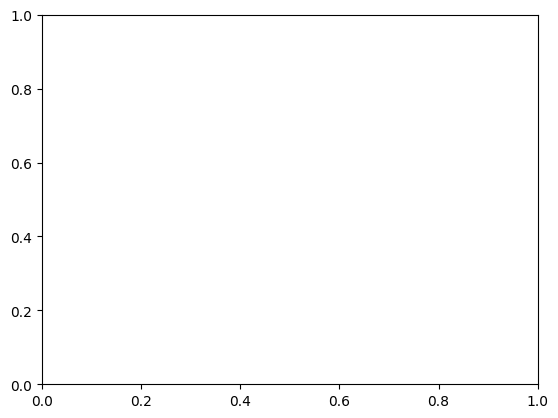

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# train = pd.read_csv(f"../workdir/AIS-ModelFrames/aisdk-2023-11-08-xs_2_kkn_train_{known}.csv")

#filename = "aisTestFile_500k_kkn"
#filename = "aisdk-2023-11-11_266288000_s_1_kknknown = 9_Step2b"
filename1 = "aisdk-2023-11-08-s_2_kkn_gnu"
#filename2 = "aisdk-2023-11-08-s_2_kkn"
df = pd.read_csv(f"../workdir/AIS-Files/{filename1}.csv")

#data =  pd.read_csv(f"../workdir/AIS-KNN-Files/{filename2}.csv", lineterminator='$').values.reshape((-1,100,6))
#multiindex = pd.MultiIndex.from_product([range(s) for s in data.shape], names=["track", "timeindex", "column"])
#data = pd.Series(data.flatten(), index=multiindex).unstack(level="column")
#data.columns = ["mmsi", "time", "x", "y", "deg", "dist"]
#data = data.drop(columns=["deg", "dist"])
#data["time"] = pd.to_datetime(data["time"], unit="s")

df.columns = ['MMSI', 'Time', 'X', 'Y', 'Deg', 'Dist']
print(f"Data size: {df.shape}")
print(f"Number of Class A: {df['MMSI'].nunique()}") 


#Time
df['Time'] = df['Time']+3600
df['Time'] = pd.to_datetime(df['Time'],unit='s')

df['Time'].hist(bins=(df['Time'].nunique()))
plt.ylabel('Positionen')
plt.xlabel('Zeit')
#plt.show
plt.savefig(f"{folderoutput}{filename}_time.png", bbox_inches='tight', dpi=600)
plt.cla()




#MMSI
df['MMSI'].hist(bins=(df['MMSI'].nunique()))
plt.ylabel('Positionen')
plt.xlabel('Schiffe')
#plt.show
plt.savefig(f"{folderoutput}{filename}_mmsi.png", bbox_inches='tight', dpi=600)
plt.cla()

ddd = df['MMSI'].value_counts()

print(ddd.describe())

#print(f"Number of MMSI: {ddata.describe(include=['MMSI'])}")

#Distances



#Time of Travel

#Speed


df.head(102)
#data.head(4)

Data size: (3113550, 29)


,input_0_time,input_0_x,input_0_y,input_1_time,input_1_x,input_1_y,input_2_time,input_2_x,input_2_y,input_3_time,...,input_7_x,input_7_y,input_8_time,input_8_x,input_8_y,output_x,output_y,range,angle,Speed
0,70.0,0.0,0.0,61.0,0.0,0.2,60.0,0.0,0.2,50.0,...,1.3,0.4,1.0,1.6,0.6,1.6,0.6,1.708801,20.556045,0.024411
1,71.0,0.0,0.0,60.0,0.6,-0.3,50.0,0.9,-0.2,41.0,...,1.5,0.7,11.0,1.3,0.6,0.7,0.5,0.860233,35.537678,0.012116
2,77.0,0.0,0.0,69.0,0.3,0.3,58.0,0.3,0.7,50.0,...,-1.7,0.1,9.0,-2.2,0.1,-2.2,0.0,2.200000,180.000000,0.028571
3,80.0,0.0,0.0,71.0,-0.5,-0.2,70.0,-0.5,-0.2,60.0,...,-0.7,-1.1,11.0,-0.7,-0.9,0.1,-1.6,1.603122,-86.423666,0.020039


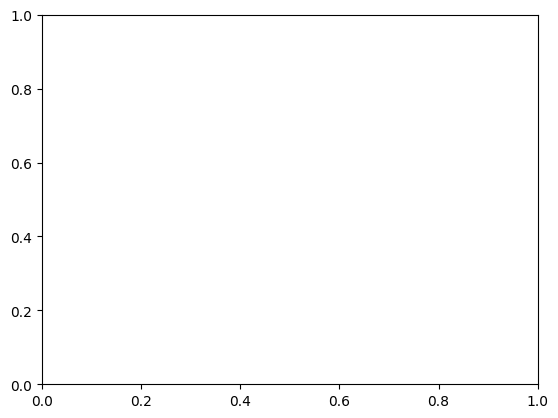

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math


# train = pd.read_csv(f"../workdir/AIS-ModelFrames/aisdk-2023-11-08-xs_2_kkn_train_{known}.csv")

#filename = "aisTestFile_500k_kkn"
#filename = "aisdk-2023-11-11_266288000_s_1_kknknown = 9_Step2b"
filename = "aisdk-2023-11-08-s_2_kkn"

known = 9
df = pd.read_csv(f"../workdir/AIS-ModelFrames/{filename}_train_{known}_0.csv")

#df.columns = ['MMSI', 'Time', 'X', 'Y', 'Deg', 'Dist']
print(f"Data size: {df.shape}")


# Travel time
df['input_0_time'].hist(bins=df['input_0_time'].nunique())
plt.ylabel('Schiffesbewegung')
plt.xlabel('Zeit [s]')
#plt.show
plt.savefig(f"{folderoutput}{filename}_train_{known}_0_time.png", bbox_inches='tight', dpi=600)
plt.cla()

ddd = df['input_0_time'].value_counts()
print(f"Travel time: {ddd.describe()}")


# Distance 
df['range'] = np.sqrt(df['output_x']**2 + df['output_y']**2)
df['range'].hist(bins=300)
plt.ylabel('Schiffesbewegung')
plt.xlabel('Distanz [m]')
#plt.show
plt.savefig(f"{folderoutput}{filename}_train_{known}_0_distance.png", bbox_inches='tight', dpi=600)
plt.cla()

ddd = df['range'].value_counts()
print(f"range: {ddd.describe()}")


# Heading
df['angle'] = (np.arctan2(df['output_y'], df['output_x'])) * 180 / math.pi
df['angle'].hist(bins=360)
plt.ylabel('Schiffesbewegung')
plt.xlabel('Kurs [deg]')
#plt.show
plt.savefig(f"{folderoutput}{filename}_train_{known}_0_heading.png", bbox_inches='tight', dpi=600)
plt.cla()

ddd = df['angle'].value_counts()
print(f"angle: {ddd.describe()}")

#Speed
df['Speed'] = df['range'] / df['input_0_time']
df['Speed'].hist(bins=100)
plt.ylabel('Schiffesbewegung')
plt.xlabel('Geschwindigkeit [m/s]')
#plt.show
plt.savefig(f"{folderoutput}{filename}_train_{known}_0_speed.png", bbox_inches='tight', dpi=600)
plt.cla()

ddd = df['Speed'].value_counts()
print(f"Speed: {ddd.describe()}")


df.head(4)

Data size: (1142784, 29)
Travel time: count       169.000000
mean       6762.035503
std       16740.262205
min          16.000000
25%         176.000000
50%        1912.000000
75%        6224.000000
max      152736.000000
Name: count, dtype: float64
range: count    127185.000000
mean          8.985211
std          44.166453
min           8.000000
25%           8.000000
50%           8.000000
75%           8.000000
max       15576.000000
Name: count, dtype: float64
angle: count    983112.000000
mean          1.162415
std          21.544966
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       19946.000000
Name: count, dtype: float64
Speed: count    132621.000000
mean          8.616916
std          42.816010
min           8.000000
25%           8.000000
50%           8.000000
75%           8.000000
max       15576.000000
Name: count, dtype: float64
Data size: (1142784, 29)
Travel time: count       169.000000
mean       6762.035503
std      

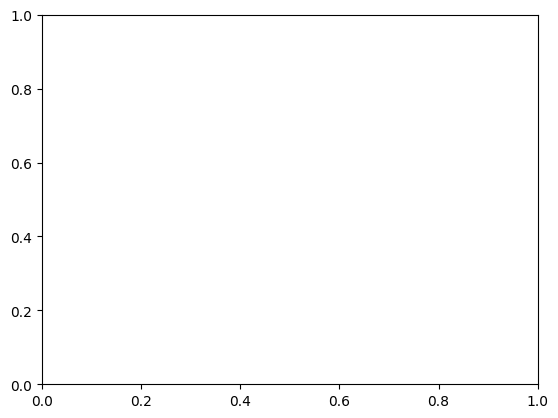

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# train = pd.read_csv(f"../workdir/AIS-ModelFrames/aisdk-2023-11-08-xs_2_kkn_train_{known}.csv")

#filename = "aisTestFile_500k_kkn"
#filename = "aisdk-2023-11-11_266288000_s_1_kknknown = 9_Step2b"
filename = "aisdk-2023-11-08-s_2_kkn"

known = 9
noise_levels = 0, 5, 10
for noise in noise_levels:
    df = pd.read_csv(f"../workdir/AIS-ModelFrames/{filename}_test_{known}_{noise}.csv")

    #df.columns = ['MMSI', 'Time', 'X', 'Y', 'Deg', 'Dist']
    print(f"Data size: {df.shape}")

    # Travel time
    df['input_0_time'].hist(bins=df['input_0_time'].nunique())
    plt.ylabel('Schiffesbewegung')
    plt.xlabel('Zeit [s]')
    #plt.show
    plt.savefig(f"{folderoutput}{filename}_test_{known}_{noise}_time.png", bbox_inches='tight', dpi=600)
    plt.cla()

    ddd = df['input_0_time'].value_counts()
    print(f"Travel time: {ddd.describe()}")


    # Distance 
    df['range'] = np.sqrt(df['output_x']**2 + df['output_y']**2)
    df['range'].hist(bins=300)
    plt.ylabel('Schiffesbewegung')
    plt.xlabel('Distanz [m]')
    #plt.show
    plt.savefig(f"{folderoutput}{filename}_test_{known}_{noise}_distance.png", bbox_inches='tight', dpi=600)
    plt.cla()

    ddd = df['range'].value_counts()
    print(f"range: {ddd.describe()}")


    # Heading
    df['angle'] = (np.arctan2(df['output_y'], df['output_x'])) * 180 / math.pi
    df['angle'].hist(bins=360)
    plt.ylabel('Schiffesbewegung')
    plt.xlabel('Kurs [deg]')
    #plt.show
    plt.savefig(f"{folderoutput}{filename}_test_{known}_{noise}_heading.png", bbox_inches='tight', dpi=600)
    plt.cla()

    ddd = df['angle'].value_counts()
    print(f"angle: {ddd.describe()}")

    #Speed
    df['Speed'] = df['range'] / df['input_0_time']
    df['Speed'].hist(bins=100)
    plt.ylabel('Schiffesbewegung')
    plt.xlabel('Geschwindigkeit [m/s]')
    #plt.show
    plt.savefig(f"{folderoutput}{filename}_test_{known}_{noise}_speed.png", bbox_inches='tight', dpi=600)
    plt.cla()

    ddd = df['Speed'].value_counts()
    print(f"Speed: {ddd.describe()}")

    df.head(4)

Data size: (7999999, 26)
Data size: (7999999, 5)


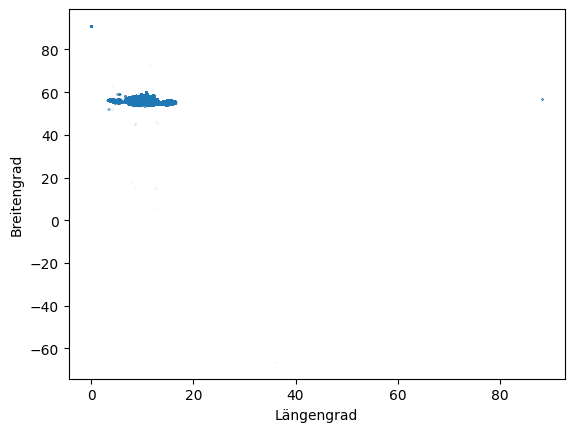

In [15]:
# Mape

import pandas as pd
import sklearn as sk
import numpy as np
from matplotlib import pyplot as plt

filename = "aisdk-2023-11-08-s"
#filename = "aisdk-2023-11-08-6xs"
#filename = "aisTestFile_500k_kkn"
#filename = "aisdk-2023-11-11_266288000_s_1_kkn_Step2b"

folderoutput = "../workdir/AIS-Images/"

# data =  pd.read_csv("../workdir/AIS-KNN-Files/aisdk-2023-11-08-xs_2_kkn.csv", lineterminator='$').values.reshape((-1,100,6))
df =  pd.read_csv(f"../workdir/AIS-Files/{filename}.csv")#, lineterminator='$')#.values.reshape((-1,100,6))h

df.head(4)

print(f"Data size: {df.shape}")

#filter -91.0
#df = df[df['Longitude'] != -91.0]
#df = df[df['Latitude'] != -91.0]

#df = df[df['Longitude'] != 91.0]
#df = df[df['Latitude'] != 91.0]

#df = df[df['Latitude'] > 53]
#df = df[df['Latitude'] < 60]

#df = df[df['Longitude'] > 0]
#df = df[df['Longitude'] < 22]

#maxLamda = max(df['Longitude'])
#minLamda = min(df['Longitude'])

#mitteLamda = (float(maxLamda) - float(minLamda))/2 + float(minLamda)

#constant = 6378137*np.pi / 180

#long ->x
#df['tmp'] = np.cos(df['Latitude'])
#df['tmp'] = constant*(df['tmp']) * 180 / np.pi *df['Longitude'] - mitteLamda
#lat ->y
#df['Latitude'] = (111320*((df['Latitude'])))

#df['Longitude'] = df['tmp']
#df.drop(columns=['tmp'], inplace=True)
df.drop(columns=['Navigational status', 'ROT', 'SOG', 'COG', 'Heading', 'IMO', 'Callsign', 'Name', 'Ship type', 'Cargo type', 'Length', 'Type of position fixing device', 'Draught', 'Destination', 'ETA', 'Data source type', 'A', 'B', 'C', 'D', 'Width'], inplace=True)


df = df[['Latitude', 'Longitude', 'MMSI', '# Timestamp', 'Type of mobile']]
df.head(4)
print(f"Data size: {df.shape}")

#df.to_csv(f"{folderoutput}{filename}_mape.csv", index=False)

#df.plot(x='Longitude',y='Latitude', kind='scatter', s=0.002)
plt.scatter(df['Longitude'],df['Latitude'], s=0.002)

plt.ylabel('Breitengrad')
plt.xlabel('Längengrad')
plt.savefig(f"{folderoutput}{filename}_mape.png", bbox_inches='tight', dpi=600)